### Updating data in plots
#### Data used in the following examples

In [1]:
x = (1..600).map { |i| i/100.0 }
y = x.map { |xx| Math.sin(xx ** 2.3) * Math.exp(-xx) }
nil

#### Updating data stored in file
First lets generate a file

In [2]:
File.open('tons_of_data', 'w') { |f| (1..300).each { |i| f.puts "#{x[i]} #{y[i]}" } }

1..300

and plot it

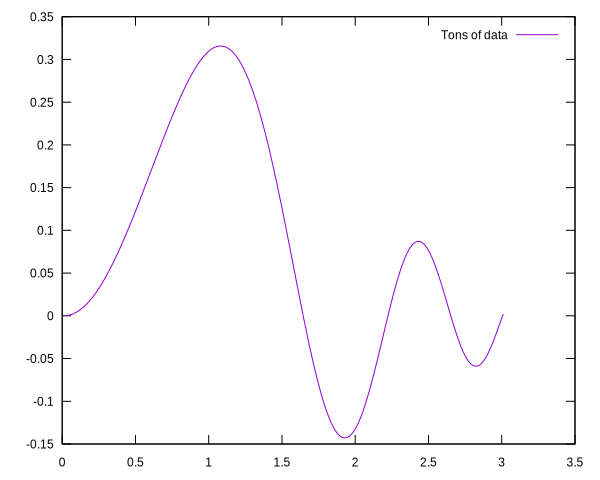

In [3]:
require 'gnuplotrb'
include GnuplotRB

graph = Plot.new(['tons_of_data', title: 'Tons of data', with: 'lines'])

Now we can just append file and replot out graph

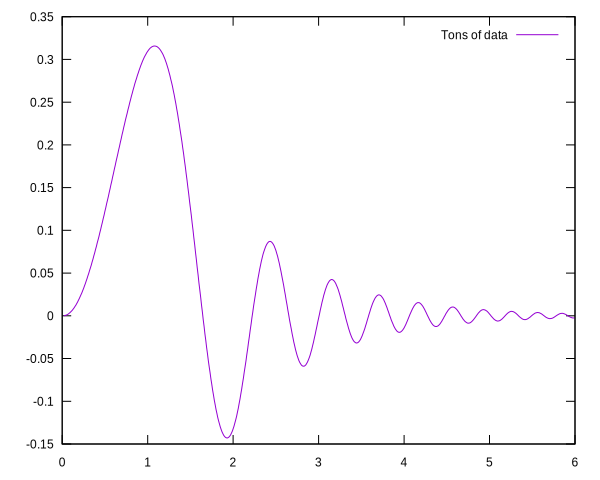

In [4]:
File.open('tons_of_data', 'a') { |f| (301..600).each { |i| f.puts "#{x[i]} #{y[i]}" } }

graph

#### Updating data given as points array
##### 1. Data stored in memory and piped to gnuplot in here-doc

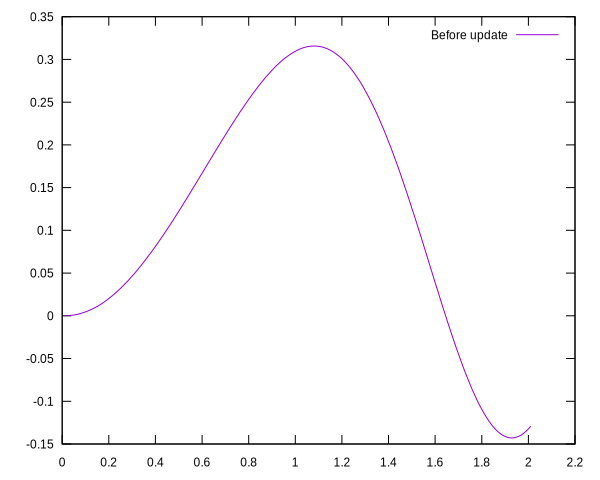

In [5]:
x0 = x[0..200]
y0 = y[0..200]
updatable_plot = Plot.new([[x0,y0], with: 'lines', title: 'Before update'])

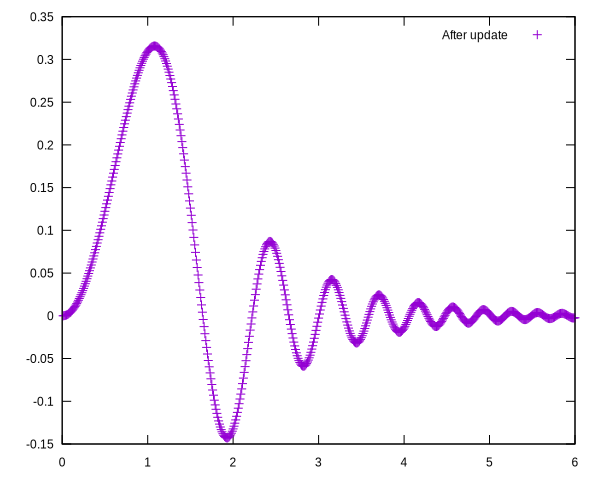

In [6]:
x1 = x[201..600]
y1 = y[201..600]
updatable_plot.update_dataset(data: [x1,y1], title: 'After update')

This way is expensive because data is piped to gnuplot each time you want to replot it, but updating data does not affect original Plot:

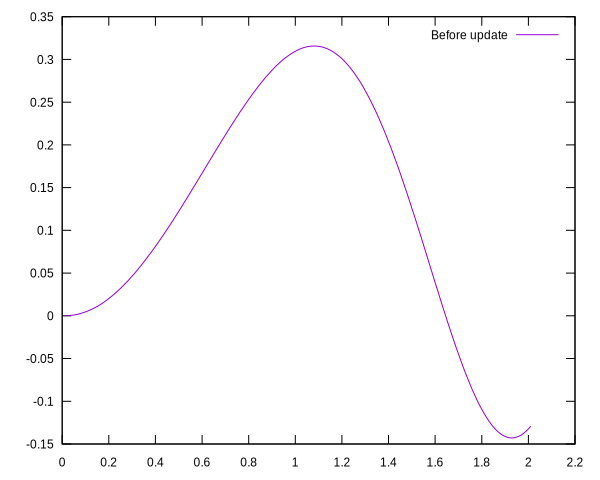

In [7]:
updatable_plot

##### 2. Data stored in temporary file and its name is piped to gnuplot
Dataset boolean option 'file' corresponds to using temporary file for storage data being plotted.

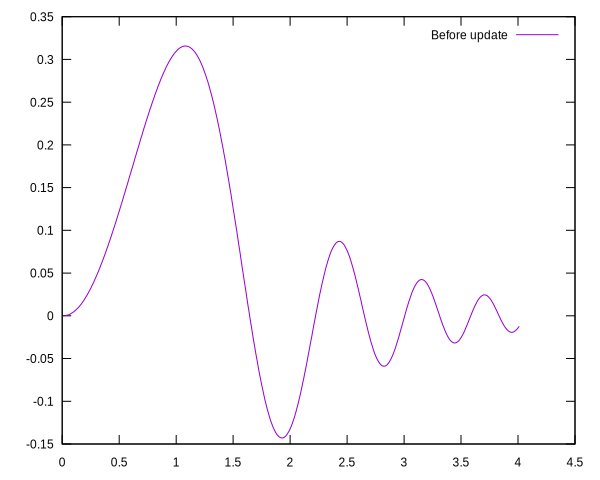

In [8]:
x0 = x[0..400]
y0 = y[0..400]
updatable_file_plot = Plot.new([[x0,y0], with: 'lines', title: 'Before update', file: true])

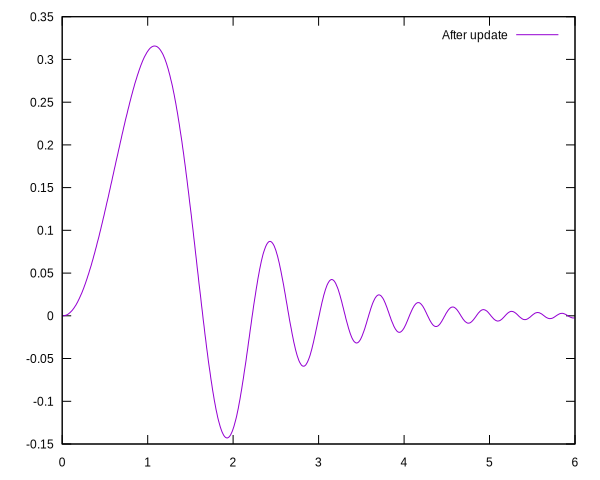

In [9]:
x1 = x[401..600]
y1 = y[401..600]
updatable_file_plot.update_dataset(data: [x1,y1], title: 'After update')

**Be careful**: updating data stored in temp file **affects** original Plot:

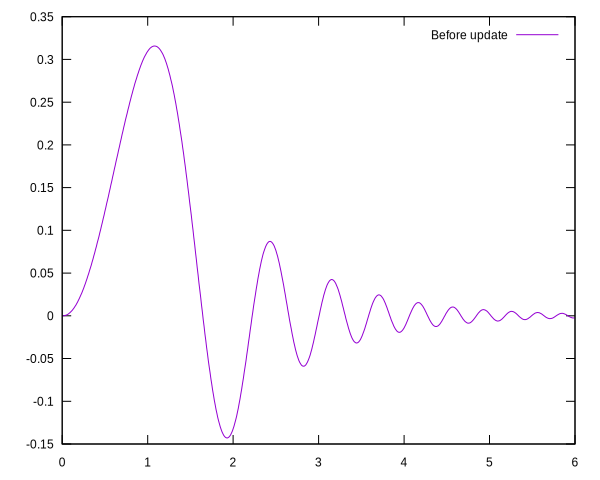

In [10]:
updatable_file_plot

### Destructive update methods
Almost every update method in GnuplotRB's classes has its destructive twin ending with '!' or '='.

#### 1. Updating options

Examples relate to Plot, but Splot, Multiplot, Animation and so on options may be changed the same way too.

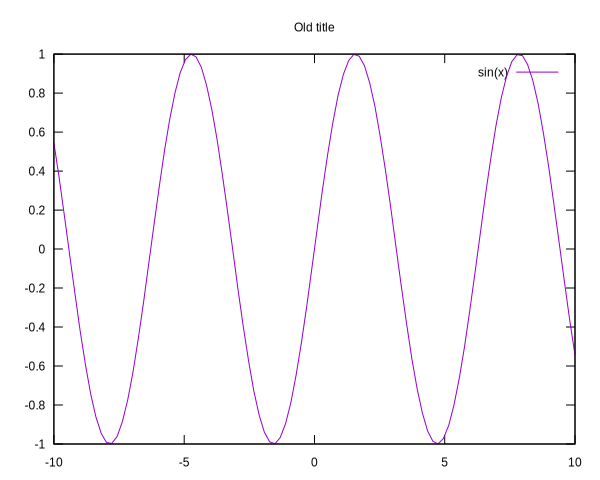

In [11]:
plot = Plot.new('sin(x)', title: 'Old title')

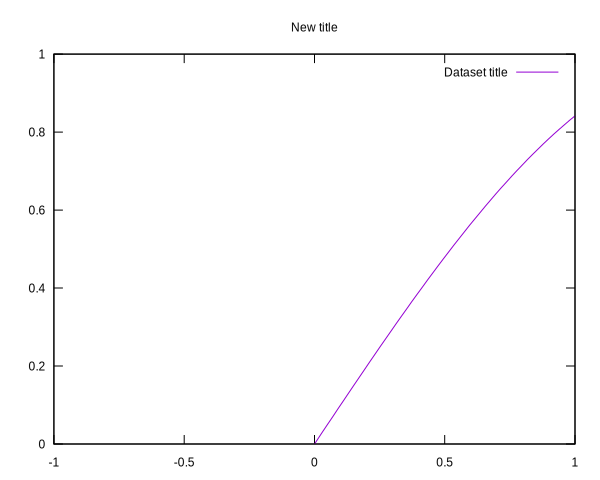

In [12]:
plot.title = 'New title'
# plot is container of datasets, so plot[0] is Dataset object
plot[0].title = 'Dataset title'
plot.xrange!(-1..1)
plot.yrange = 0..1
plot

You can update several options at once using ```#options!``` method or use something like ```Plot#update_dataset!```.Please see [GnuplotRB](https://rubygems.org/gems/gnuplotrb) doc for more methods.

#### 2. Updating containers

Plot and Splot are containers for Dataset, Multiplot and Animation - for Plots and Splots. So sometimes you may want to modify them. GnuplotRB offers methods such as ```#add_dataset```, ```#remove_dataset```, ```#replace_dataset```, ```#update_dataset```, their destructive twins (with '!' at the end) and methods like them for other classes.

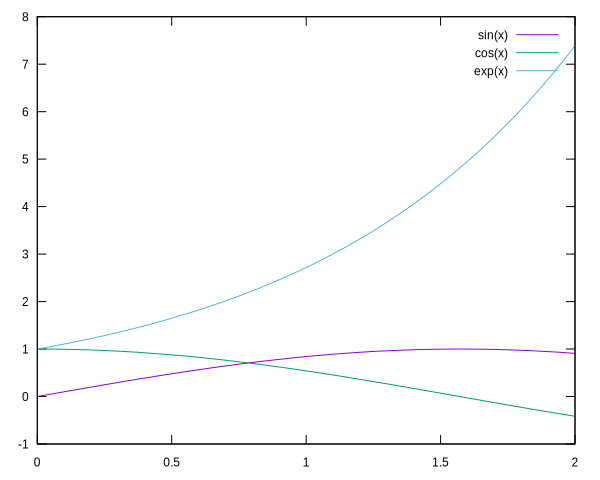

In [13]:
plot = Plot.new('sin(x)', 'cos(x)', 'exp(x)', xrange: 0..2)

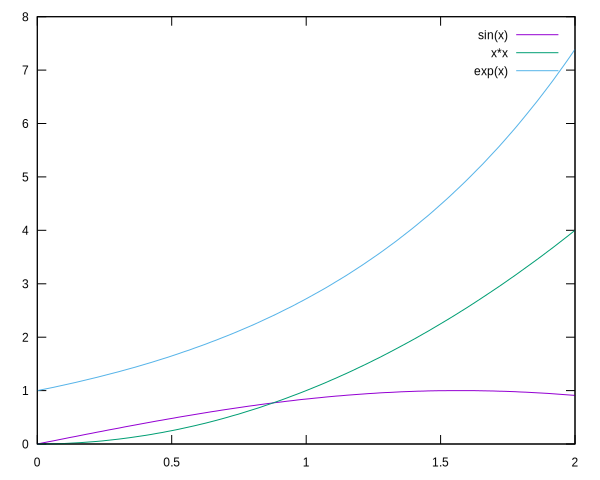

In [14]:
plot.replace_dataset(1, 'x*x') # DOES NOT modify original plot

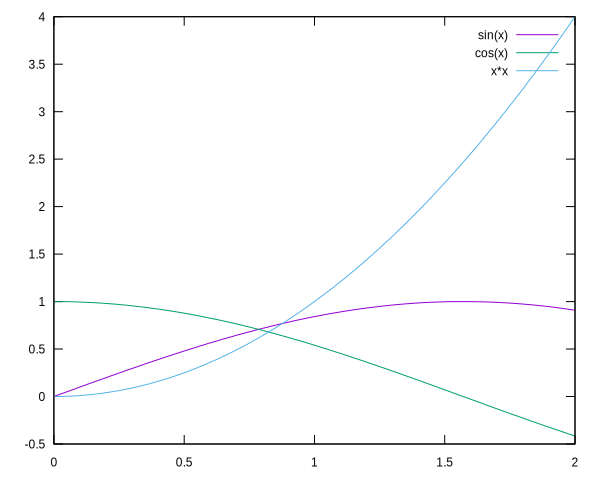

In [15]:
plot.replace_dataset!(2, 'x*x') # MODIFYES original plot

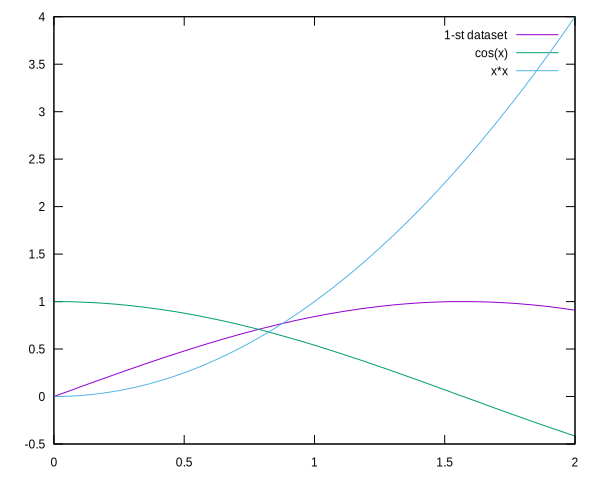

In [16]:
plot.update_dataset!(0, title: '1-st dataset')

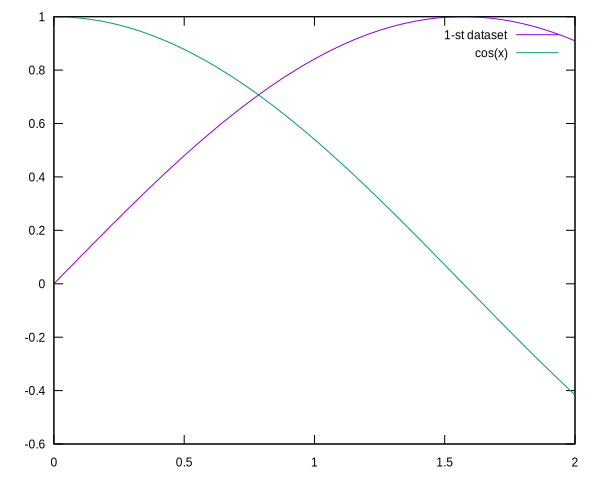

In [17]:
plot.remove_dataset!(2)